In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Seminfinite AB chain

In [16]:
N = 2
alphaA = 0.0
alphaB = 1.0
beta = -1.0

H = np.array([[alphaA,  0],
              [0,  alphaB]], dtype=complex)

V = np.array([[0,  beta],
              [beta,  0]], dtype=complex)

In [23]:
E_points = 500
eta = 1e-2
n_max = 1000

E = np.linspace(-3.0, 3.0, E_points)
dos_array = np.zeros(E_points)

for i in range(E_points):
    G0 = np.linalg.inv((E[i] + 1j*eta)*np.identity(N) - H)
    SR = G0
    for n in range(n_max):
        SR = np.linalg.inv(np.identity(N) - G0 @ V.conj().T @ SR @ V) @ G0 
    
    dos_array[i] = -np.trace(SR).imag

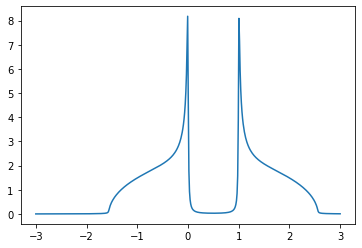

In [26]:
plt.plot(E, dos_array)

# Infinite AB chain

In [31]:
E_points = 500
eta = 1e-2
n_max = 1000

E = np.linspace(-3.0, 3.0, E_points)
dos_array = np.zeros(E_points)

for i in range(E_points):
    G0 = np.linalg.inv((E[i] + 1j*eta)*np.identity(N) - H)
    SR = G0
    SL = G0
    for n in range(n_max):
        SR = np.linalg.inv(np.identity(N) - G0 @ V.conj().T @ SR @ V) @ G0 
        SL = np.linalg.inv(np.identity(N) - G0 @ V @ SL @ V.conj().T) @ G0
    
    g = np.linalg.inv(np.identity(N) - SL @ V @ SR @ V.conj().T) @ SL
    
    dos_array[i] = -np.trace(g).imag

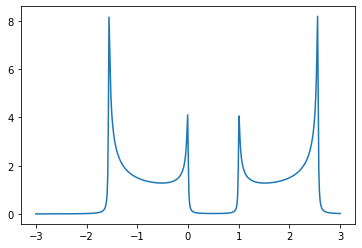

In [32]:
plt.plot(E, dos_array)

# NZZNT DOS (Green's)

In [186]:
def make_green_hamiltonian(N, alpha, beta):
    
    NN = 4*N
    H = np.identity(NN, dtype=complex) * alpha

    for i in range(NN):
        for j in range(NN):
            if i == j+1 or i == j-1:
                H[i,j] = beta

    for i in range(1, 2*N, 2):
        H[i, NN-i-1] = H[NN-i-1, i] = beta

    H[0, 2*N-1] = H[2*N-1, 0] = beta
    H[2*N, NN-1] = H[NN-1, 2*N] = beta
    
    return H

In [187]:
def make_green_V(N, beta):
    NN = 4*N
    V = np.zeros((NN, NN), dtype=complex)

    for i in range(0, 2*N, 2):
        V[i, NN-i-1] = V[NN-i-1, i] = beta
    
    return V

In [188]:
def make_green_dos(H, V, N, E, eta):
    E_points = len(E)
    NN = 4*N
    dos_array = np.zeros(E_points)

    for i in range(E_points):
        G0 = np.linalg.inv((E[i] + 1j*eta)*np.identity(NN) - H)
        SR = G0
        SL = G0
        for n in range(n_max):
            SR = np.linalg.inv(np.identity(NN) - G0 @ V.conj().T @ SR @ V) @ G0 
            SL = np.linalg.inv(np.identity(NN) - G0 @ V @ SL @ V.conj().T) @ G0

        g = np.linalg.inv(np.identity(NN) - SL @ V @ SR @ V.conj().T) @ SL

        dos_array[i] = -np.trace(g).imag
    
    return dos_array

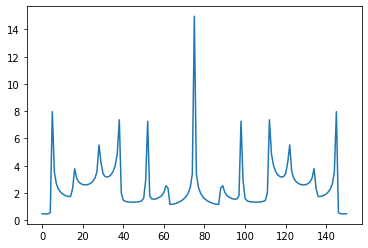

In [191]:
N = 4
alpha = 0.0
beta = -2.8

eta = 1e-2
n_max = 1000

E_points = 151
E = np.linspace(-9.0, 9.0, E_points)

H = make_green_hamiltonian(N, alpha, beta)
V = make_green_V(N, beta)

dos = make_green_dos(H, V, N, E, eta)
plt.plot(dos)

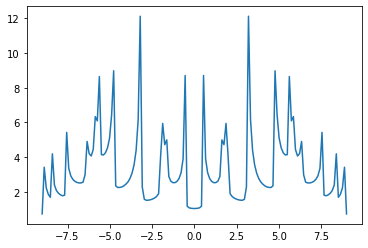

In [190]:
N = 5
alpha = 0.0
beta = -2.8

eta = 1e-2
n_max = 1000

E_points = 150
E = np.linspace(-9.0, 9.0, E_points)

H = make_green_hamiltonian(N, alpha, beta)
V = make_green_V(N, beta)

dos = make_green_dos(H, V, N, E, eta)
plt.plot(E, dos)